# Normal Distribution 

### A brief history of the normal distribution 

Normal distribution was initially observed by French mathematician Abraham de Moivre. De Moivre had an interest in gambling and used mathematics to try to determine the odds of coin tosses. He was attempting to come up with a mathematical expression to represent the probability. 

In the early 1800's Adrian and Gauss independently came up with the formula for normal distribution described below. 
The interesting thing about normal distribution is how often it occurs naturally. Lambert Adolphe Jacques Quetelet, an astronomer and mathematician is the first person to notably apply the normal distribution to the characteristics of people. 

Previously, Laplace had discovered the same formula, when working on the central limit theorem, which states with a mean and standard deviation, when a sample size continues to increase in size the shape of the curve will appear to move towards a standard distribution.


### A technical explanation of normal distribtion

Normal distribution is a continuous probability distribution, where the curve is a bell-shaped curve around the mean and median. Where the mean and median are equal. The values are mostly gathered around the mean, where half are above, and half are below the mean. The number of values fall off as you move away from the mean.
Properties of the normal distribution are:
1.	The Curve must be symmetrical, half the values must be above the mean and half below.
2.	Mean and Median must be equal, and the centre point of the curve.
3.	Empirical rule - The three-sigma rule: 68% of data points lands in either above or below the mean with in the first standard deviation, 95% within two standard deviations above or below the mean, and 99.7% within the first three standard deviations above or below the mean
4.	Skewness and kurtosis - Skewness is how the symmetry of the curve lines up a normal distribution and kurtosis is how thick the tails in each direction are in relation to a normal distribution.


### Standard deviation graph

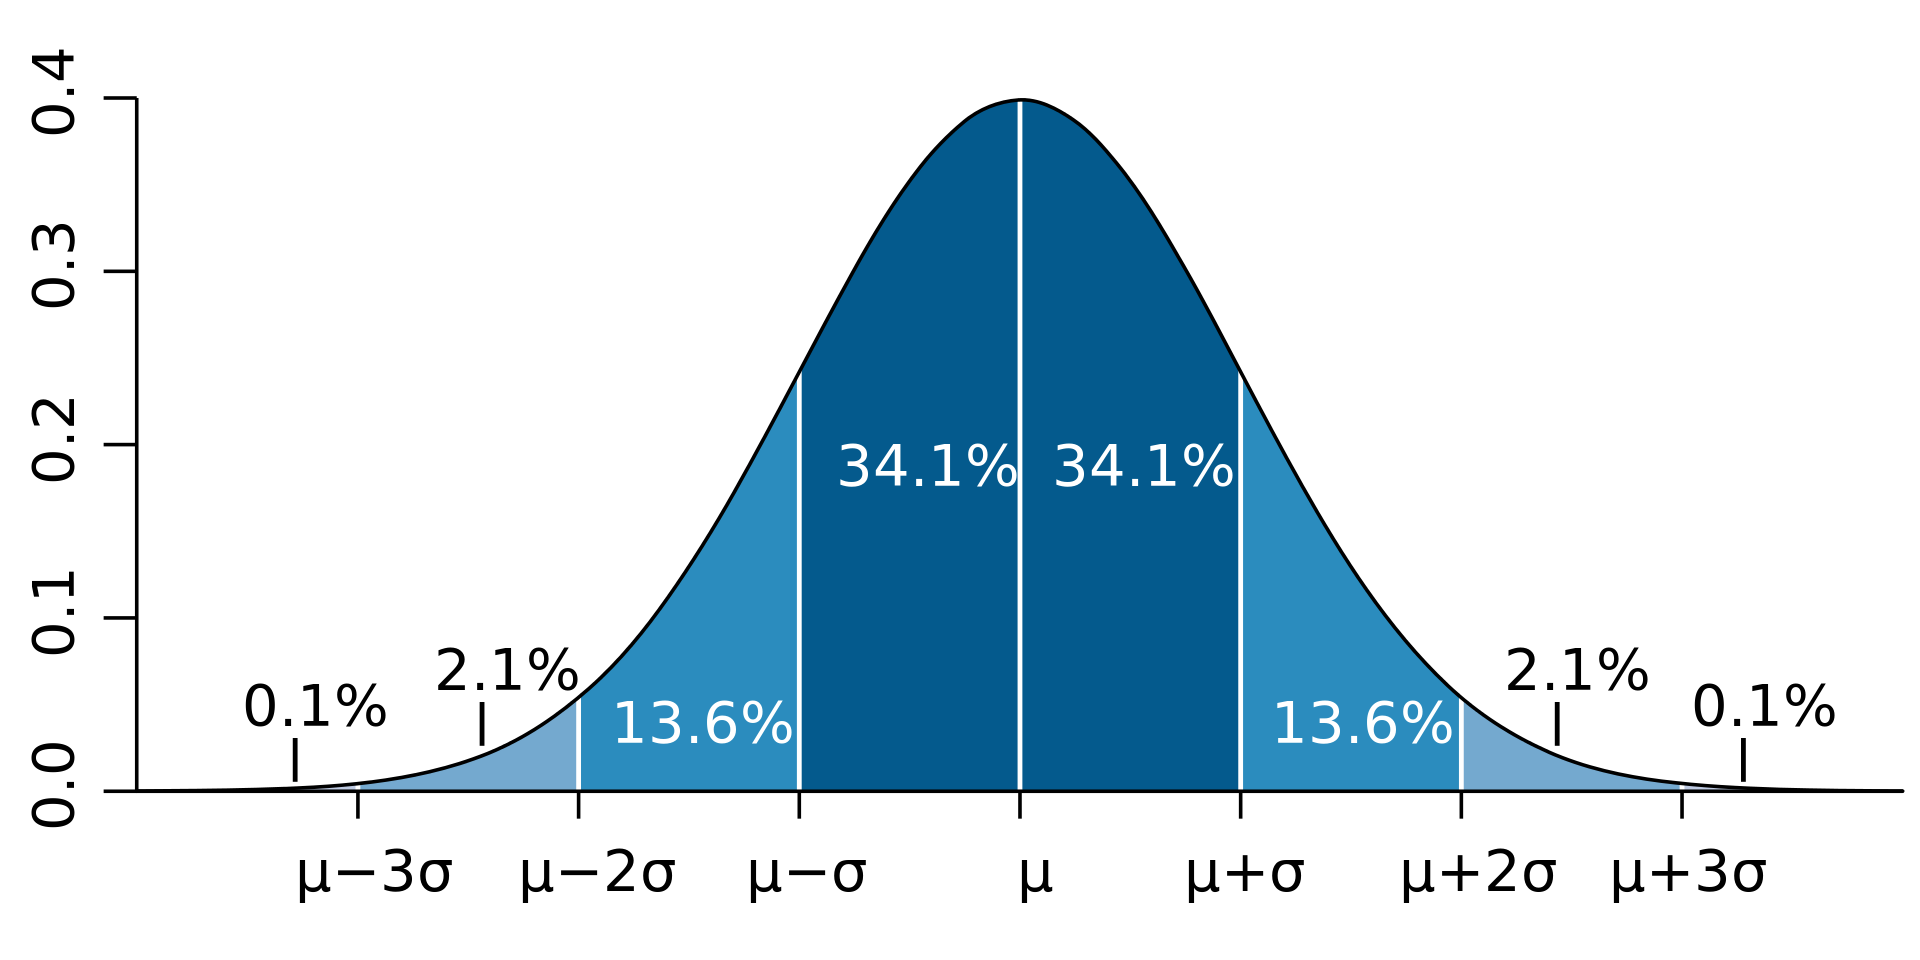


https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Standard_deviation_diagram_micro.svg

### Normal Distribution shown through python

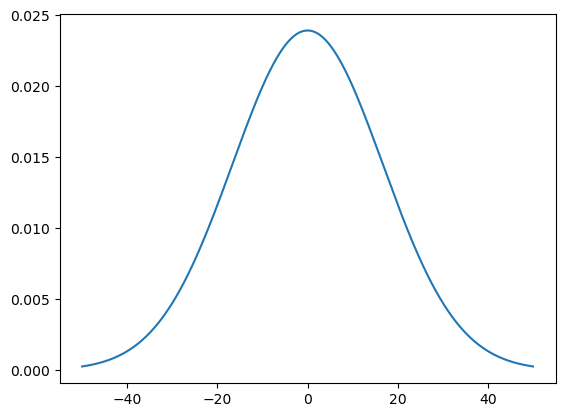

In [1]:
#Adapted from https://www.statology.org/plot-normal-distribution-python/
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import kurtosistest

#x-axis ranges from 50 and 50 with .01 steps
x = np.arange(-50, 50, .01)

#plot normal distribution with mean 0 and standard deviation 16.6667
plt.plot(x, norm.pdf(x, 0, 16.6667))

### The equation for normal distribution is:

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

where:

$\mu$ is the mean/median 

$\sigma$ is the standard deviation


Mean ($\mu$) is by the average value of the random variables in a probability distribution 

Standard deviation ($\sigma$) is the distance of the values from the mean/average. A low standard deviation indicates low variance, i.e. values appear close to the mean. A high standard deviation indicates a high variance, Values are not centered close to the mean. 

### Further depiction of the normal distribution using python

In [6]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

mu, sigma = 300, 100 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))

0.16949172314438954

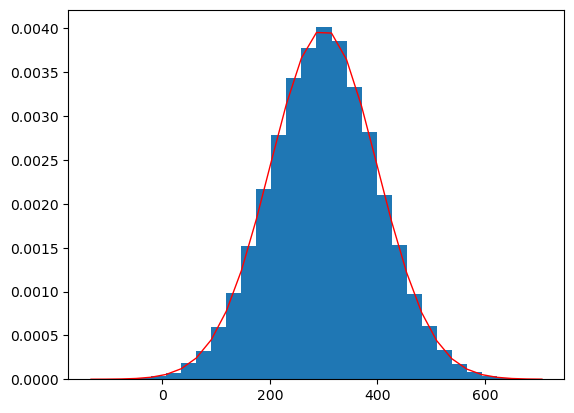

In [7]:
# I took the code from the numpy website, but rearranged it to read like the formula, 1/(np.sqrt(2 * np.pi*(sigma**2))) 

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi*(sigma**2))) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=1, color='r')
plt.show()

In [8]:
# Using python to test for normality - using scipy documentation
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
# The meaning of failing to reject the null hypothesis
#https://osf.io/tz48r/download#:~:text=Thus%2C%20if%20you%20reject%20the,your%20data%20is%20normally%20distributed.
# We test for P: if P < alpha, the null hypothesis can be rejected and the data is not normally distributed 
#if p > alpha, the null hypothesis cannot be rejected and the data is normally distributed

k2, p = stats.normaltest(s)
alpha = 1e-3
print("p = {:g}".format(p))
    
# current P value is p = p = 0.772788, which is > alpha, indicating the data is normal

p = 0.772788


In [9]:
#Implementing kurtosis test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html
# Interpreting returned values 
# https://www.statology.org/z-value-vs-p-value/
# https://docs.scipy.org/doc/scipy-1.2.0/reference/generated/scipy.stats.kurtosistest.html
# kurtosis = 3(n-1)/(n+1).
# https://variation.com/wp-content/distribution_analyzer_help/hs133.htm#:~:text=The%20normal%20distribution%20has%20a,than%20or%20equal%20to%200.05.


kurtosistest(s)
#current P value is 0.7012399986193922,
# as this is over 0.05 this means the distribution is normal


KurtosistestResult(statistic=0.38364713647103377, pvalue=0.7012399986193922)

### Testing for normal distribution 

There are a few more ways to test for normal distribution: 

Q-Q Plot - Q- Q plot is a graph that plots quantiles of 2 distributions together, this allows us to view the scatter plots of a set of data and compare it to a normal distribution quantiles/percentile. This is a test that allows us to quickly/visually compare a data set to see if it matches the normal distribution. 

Shapiro-Wilk test is a statistical method used to check if a sample of data comes from a normal distribution. It calculates a value called "W" and compares it to a certain threshold. If the W value is lower than the threshold, it means that the sample is not normally distributed and the data the sample came from is not normally distributed. 


Lilliefors test is based on the Kolmogorov Smirnov test, it is similar to the Shapiro-Wilk test, but where the shapiro-wilk test can be calculated by hand, and requires a large amount of sample size, the Lilliefors test is done using computation software, it can be done using python packages statsmodels.stats.diagnostic.lilliefors

Other ways to test include: Anderson-Darling Normality Test and Kolmogorov Smirnov test

References:
https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/normal-distributions-library/a/normal-distributions-review

https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/density-curves/v/median-mean-and-skew-from-density-curves

https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/stats-normal-distributions/v/ck12-org-normal-distribution-problems-qualitative-sense-of-normal-distributions

https://statisticsbyjim.com/basics/normal-distribution/

https://corporatefinanceinstitute.com/resources/data-science/normal-distribution/

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

https://www.mathsisfun.com/data/standard-normal-distribution.html

https://en.wikipedia.org/wiki/Normal_distribution#Definitions

https://www.google.com/search?q=normal+distribution+definition&rlz=1C1ONGR_enIE933IE933&oq=normal+distribution+def&aqs=chrome.0.0i512j69i57j0i512l5j69i60.15472j0j7&sourceid=chrome&ie=UTF-8

https://www.techtarget.com/whatis/definition/normal-distribution

https://www.statology.org/plot-normal-distribution-python/

https://en.wikipedia.org/wiki/Mean#Statistical_location

https://en.wikipedia.org/wiki/Standard_deviation

https://www.z-table.com/history-on-normal-distirbution.html#:~:text=The%20origin%20of%20normal%20distribution,probability%20distribution%20of%20coin%20flips.

https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.

https://onlinestatbook.com/2/normal_distribution/history_normal.html

https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=For%20quick%20and%20visual%20identification,use%20the%20Shapiro%20Wilk%20test.

https://encyclopediaofmath.org/wiki/Kolmogorov-Smirnov_test

https://variation.com/wp-content/distribution_analyzer_help/hs141.htm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html

https://www.statology.org/z-value-vs-p-value/

https://docs.scipy.org/doc/scipy-1.2.0/reference/generated/scipy.stats.kurtosistest.html

https://variation.com/wp-content/distribution_analyzer_help/hs133.htm#:~:text=The%20normal%20distribution%20has%20a,than%20or%20equal%20to%200.05.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

https://osf.io/tz48r/download#:~:text=Thus%2C%20if%20you%20reject%20the,your%20data%20is%20normally%20distributed.